In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import warnings 
import os
import matplotlib.pyplot as plt

In [2]:
os.chdir('/home/tapas/HR_Analytics/')

In [3]:
warnings.filterwarnings("ignore") 
hr = pd.read_csv("HR_data.csv", header=0) #Read the dataset
hr.head() #Display first few rows of the dat

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


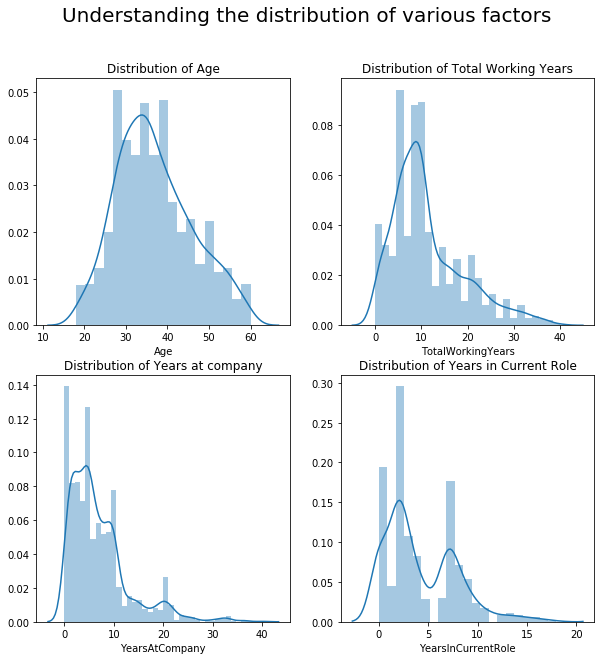

In [4]:
# Reference for adding title for each sub plots: https://gist.github.com/dyerrington/dac39db54161dafc9359995924413a12
fig,ax = plt.subplots(2,2, figsize=(10,10))               # 'ax' has references to all the four axes
plt.suptitle("Understanding the distribution of various factors", fontsize=20)
sns.distplot(hr['Age'], ax = ax[0,0])  # Plot on 1st axes
ax[0][0].set_title('Distribution of Age')
sns.distplot(hr['TotalWorkingYears'], ax = ax[0,1])  # Plot on IInd axes
ax[0][1].set_title('Distribution of Total Working Years')
sns.distplot(hr['YearsAtCompany'], ax = ax[1,0])  # Plot on IIIrd axes
ax[1][0].set_title('Distribution of Years at company')
sns.distplot(hr['YearsInCurrentRole'], ax = ax[1,1])  # Plot on IV the axes
ax[1][1].set_title('Distribution of Years in Current Role')
plt.show()                                                # Show all of them now

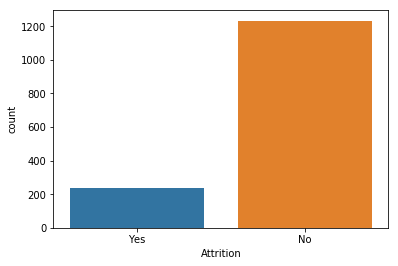

In [5]:
sns.countplot(hr['Attrition'])
plt.show()

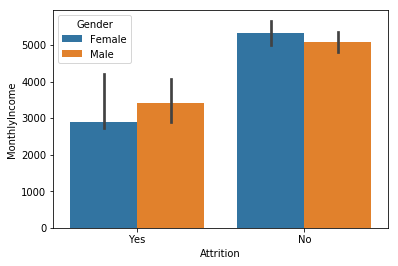

In [6]:
#Bar plot of Job Satisfaction with respect to distance from home according to gender
#Estimator used is median
from numpy import median
sns.barplot(x='Attrition', y='MonthlyIncome', hue= 'Gender',data=hr, estimator=median)
plt.show()

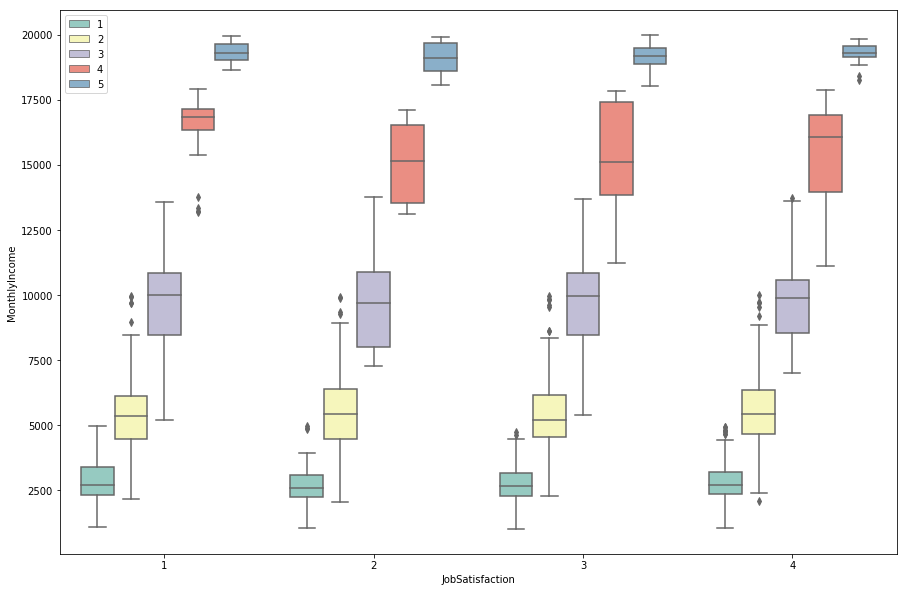

In [7]:
f,ax = plt.subplots(figsize=(15,10))
sns.boxplot(x='JobSatisfaction', y='MonthlyIncome', data=hr, hue='JobLevel',palette='Set3')
plt.legend(loc='best')
plt.show()

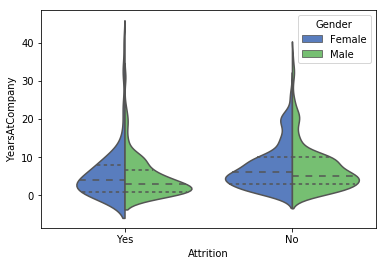

In [8]:
sns.violinplot(x="Attrition", y="YearsAtCompany", hue="Gender", data=hr, palette="muted", split=True,
               inner="quartile")
plt.show()

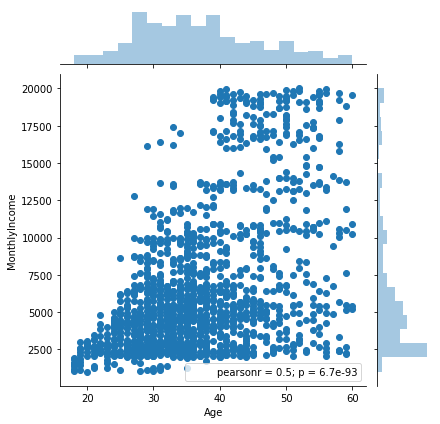

In [9]:
## Joint scatter plot
sns.jointplot(hr.Age,hr.MonthlyIncome, kind = "scatter")   
plt.show()

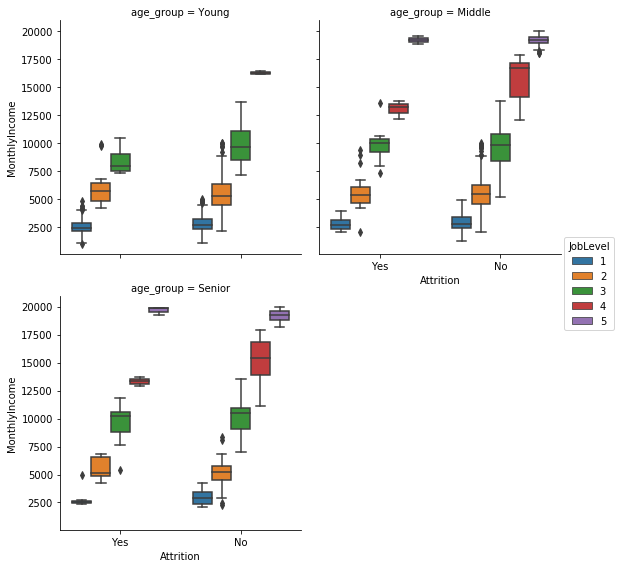

In [10]:
hr['age_group'] = pd.cut(hr['Age'], 3, labels=['Young', 'Middle', 'Senior']) #Slicing the continuous data into various groups
sns.factorplot(x =   'Attrition',     # Categorical
               y =   'MonthlyIncome',      # Continuous
               hue = 'JobLevel',    # Categorical
               col = 'age_group',
               col_wrap=2,           # Wrap facet after two axes
               kind = 'box',
               data = hr)
plt.show()

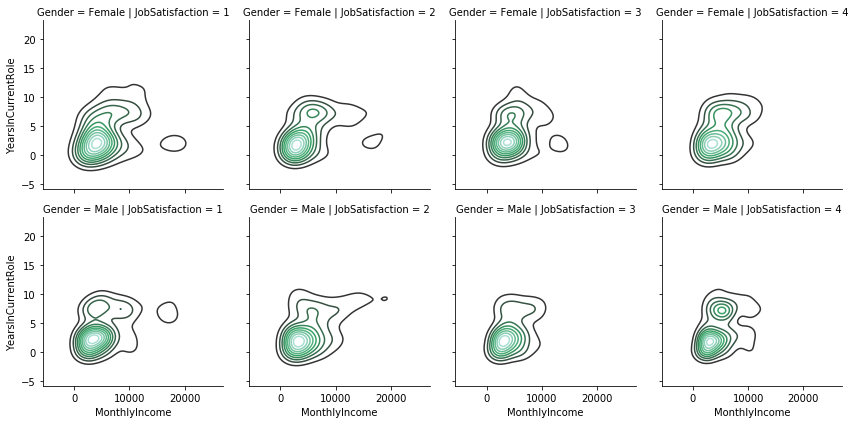

In [11]:
g = sns.FacetGrid(hr, col="JobSatisfaction", row="Gender")
g.map(sns.kdeplot, "MonthlyIncome", "YearsInCurrentRole")
plt.show()

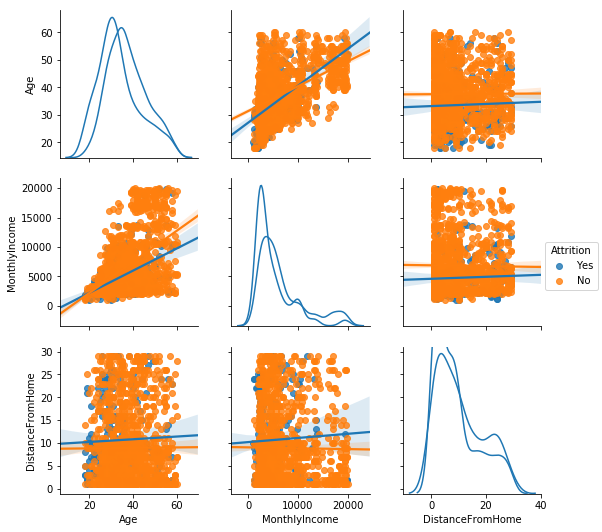

In [12]:
data1 = ['Attrition','Age','MonthlyIncome','DistanceFromHome']
sns.pairplot(hr[data1], kind="reg", diag_kind = "kde" , hue = 'Attrition' )
plt.show()

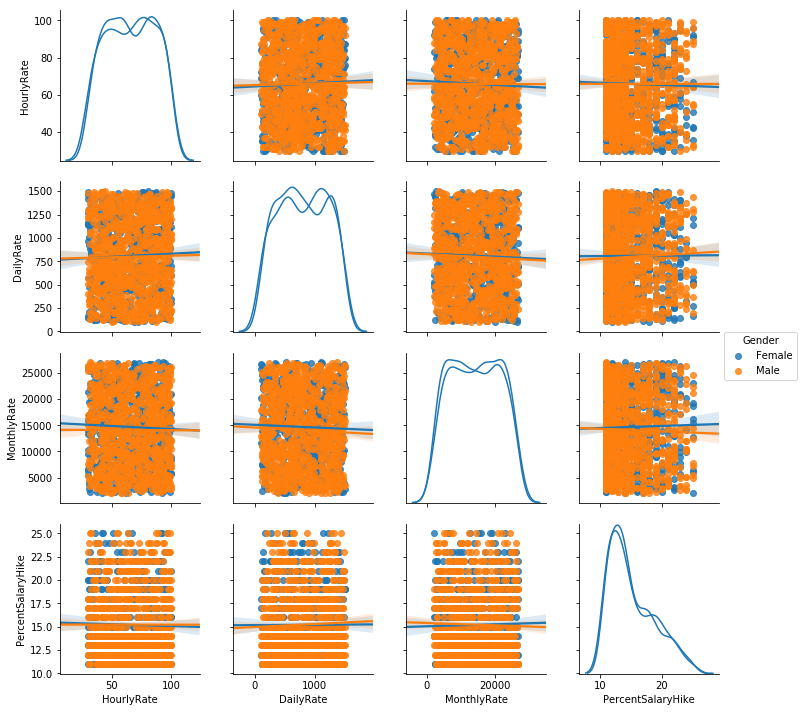

In [13]:
data2 = ['Gender', 'HourlyRate','DailyRate','MonthlyRate','PercentSalaryHike']
sns.pairplot(hr[data2], kind="reg", diag_kind = "kde" , hue = 'Gender' )
plt.show()

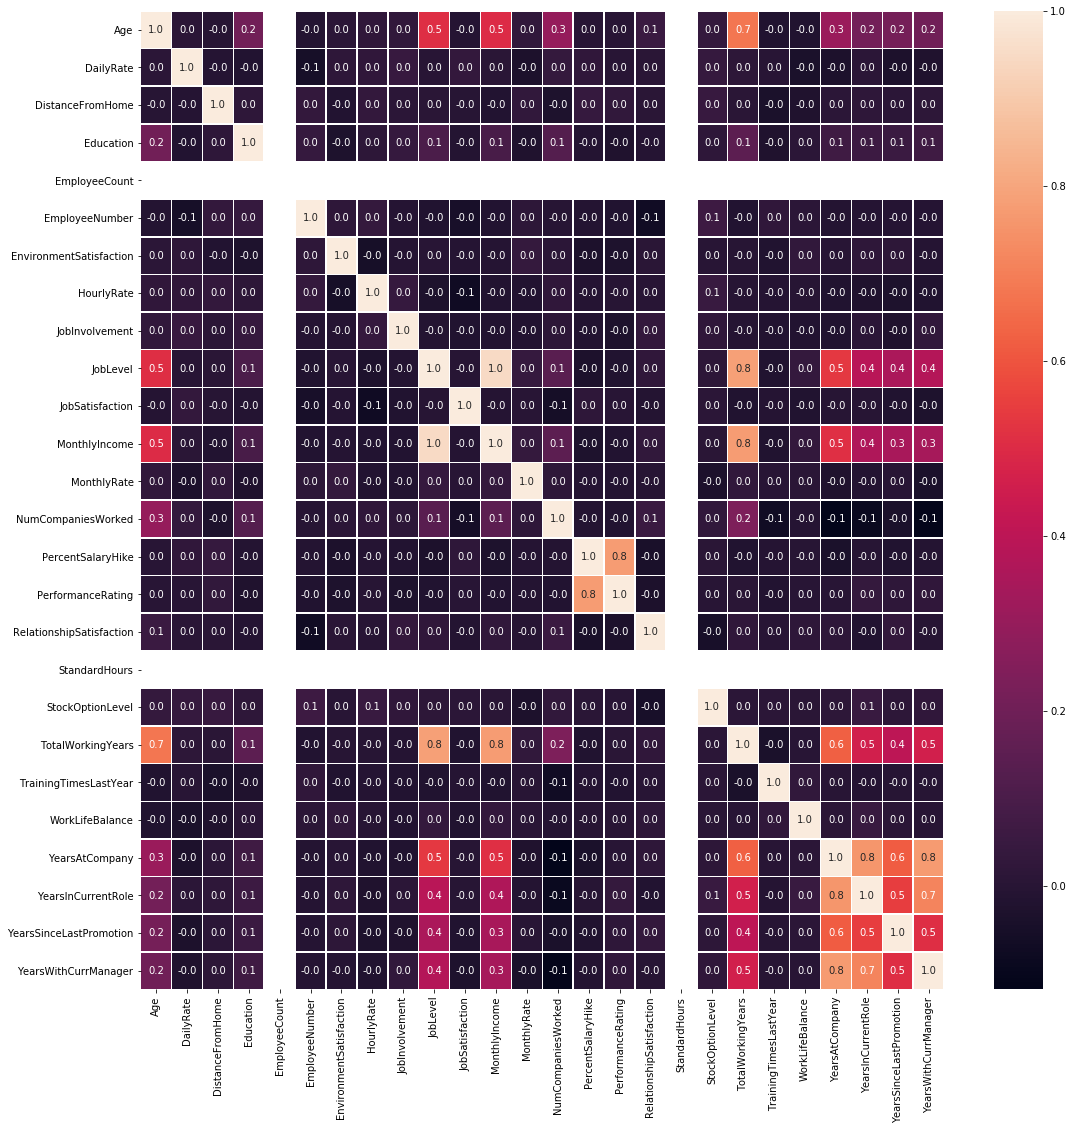

In [14]:
#Plot a correlation map for all numeric variables
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(hr.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()